### Disciplina de Cálculo Numérico

#### Curso: Engenharia da Computação

#### Discente: Raphaell Maciel de Sousa

#### Data: 16/04/2020

Ex.: Considere a equação:

\begin{equation}
f(x) = \sqrt{3x+1}-2e^{-3x}
\end{equation}
O domínio da função é tal que:
\begin{equation}
3x+1>=0
\end{equation}
ou
\begin{equation}
x>=-1/3
\end{equation}

Obs.: A verificação do domínio é importante pois vai definir os limites de valores de entrada da função, ou seja, não se pode entrar com valores divergentes do domínio.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

#### Fase 1: Isolameno da raiz em um intervalo

In [2]:
functionArray = []
xAxisArray = []

contSinal = 0

limInfX = -0.33
limSupX = 5
passoDeCalculo = 0.1

limInfX = -2
limSupX = 5
passoDeCalculo = 1

#def f(x):
    #Domínio da função:
    #x>=-1/3
#    return math.sqrt(3*x+1)-2*math.exp(-3*x)

def f(x):
    #Domínio da função:
    #x<=5
    return math.sqrt(5-x)-2*(x-1)

for x in np.arange(limInfX, limSupX, passoDeCalculo):    
    functionArray.append(f(x))
    xAxisArray.append(x)
    
    if f(limInfX) > 0:        
        if f(x) < 0 and contSinal == 0:
            a = x-passoDeCalculo
            b = x
            print "A raiz está entre o intervalo:"
            print "Limite Inferior:", a
            print "Limite Superior", b
            contSinal = 1
            
    else:        
        if f(x) > 0 and contSinal == 0:
            a = x-passoDeCalculo
            b = x
            print "A raiz está entre o intervalo:"
            print "Limite Inferior:", a
            print "Limite Superior", b
            contSinal = 1

A raiz está entre o intervalo:
Limite Inferior: 1
Limite Superior 2


In [3]:
#https://docs.scipy.org/doc/scipy/reference/optimize.html

from scipy.optimize import fsolve

root = fsolve(f, 0.3)[0]
print "Raiz da equação via Scipy library:", root

Raiz da equação via Scipy library: 1.8827822185373186


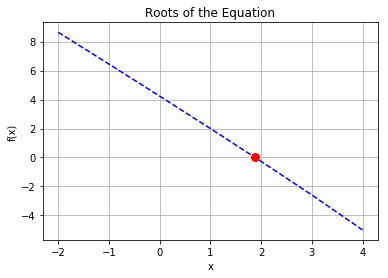

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(xAxisArray, functionArray, 'b--')
plt.plot([root], [0], marker='o', markersize=8, color="red")
ax.set_title("Roots of the Equation")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.grid(True)
plt.show()

#### Fase 2: Refinamento das Raízes: Método da Bissecção ou Método do Meio Intervalo MMI

#### 1. Cálculo do Ponto Médio

\begin{equation}
\bar{x} = (a + b)/2
\end{equation}

In [5]:
xMedio = (a + b)/2

#### 2. Calcula-se f(xMedio):

```sh
Se f(xMedio)=0 => xMedio é raiz

Senão:

    Se f(xMedio)*f(a)<0
        a, b = (a, xMedio)
        
    Senão Se f(xMedio)*f(a)>0
        a, b = (xMedio, b)

```

In [6]:
cont = 0

if f(xMedio) == 0:
    print "A raiz da Equação é: ", xMedio
    
else:
    while (abs(f(xMedio))>0.01):
        if f(xMedio)*f(a)<0:
            b = xMedio            
        
        if f(xMedio)*f(a)>0:
            a = xMedio
        
        xMedio = (a + b)/2.0        
        cont = cont+1
                
print "A raiz da Equação pelo método da Bissecção é: ", xMedio

A raiz da Equação pelo método da Bissecção é:  1.8828125


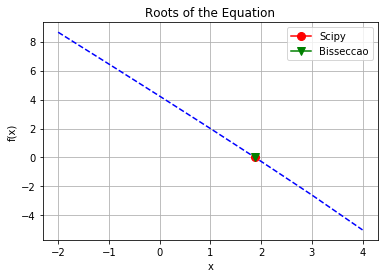

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(xAxisArray, functionArray, 'b--')
plt.plot([root], [0], marker='o', markersize=8, color='red', label='Scipy')
plt.plot([xMedio], [0], marker='v', markersize=8, color='green', label='Bisseccao')

ax.set_title("Roots of the Equation")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

plt.grid(True)
plt.legend()